In [184]:
import os
import re
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from functools import reduce
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import FeatureHasher
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.mixture import BayesianGaussianMixture,GaussianMixture
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from scipy import interp
from sklearn.metrics import roc_curve, auc


In [93]:
to_modeling = pd.read_csv("to_modeling.csv")
to_modeling["default_ratio"] = to_modeling["default_ratio"] = list(map(lambda x,y:x/y,to_modeling.neg_diff,to_modeling.npayments))
to_modeling.head()

name  old_cust  discont_cust  age  c_age  92101  92102  92103  \
0   Aaron Huston      True         False    0     38    0.0    0.0    0.0   
1    Abbey Kluth      True         False    0     46    0.0    0.0    0.0   
2    Abe Prophet      True         False    0     42    0.0    0.0    0.0   
3    Abel Emmett      True         False   45     45    0.0    0.0    0.0   
4  Abraham Maggi      True         False    0     41    0.0    0.0    0.0   

   92104  92105      ...        92199  early_payment  late_payment  \
0    0.0    0.0      ...          0.0             32             0   
1    0.0    0.0      ...          0.0             12            20   
2    0.0    0.0      ...          0.0             32             0   
3    0.0    0.0      ...          0.0             32             0   
4    0.0    0.0      ...          0.0             23             3   

   avg_pay_capacity  neg_diff  defaulter  paymentAmount  rentAmount  \
0         1720.0000         0      False        55040.0     55040.0   
1         1845.9688         0      False        59071.0     51808.0   
2         1107.2812         1       True        35433.0     36576.0   
3         1802.0000         0      False        57664.0     57664.0   
4         1306.8000         0      False        39204.0     38070.0   

   npayments  default_ratio  
0         32        0.00000  
1         32        0.00000  
2         32        0.03125  
3         32        0.00000  
4         26        0.00000  

[5 rows x 95 columns]

In [43]:
to_modeling["default_ratio"].describe()

count    1989.000000
mean        0.019423
std         0.026333
min         0.000000
25%         0.000000
50%         0.000000
75%         0.031250
max         0.250000
Name: default_ratio, dtype: float64

In [94]:
to_modeling["l1_defaulter"] = False
to_modeling["l2_defaulter"] = False
to_modeling["l3_defaulter"] = False
mean = 0.019423
std = 0.026333
to_modeling.loc[to_modeling["default_ratio"]>(0),"l1_defaulter"] = True
to_modeling.loc[to_modeling["default_ratio"]>mean+std,"l2_defaulter"] = True
to_modeling.loc[to_modeling["default_ratio"]>mean+(2*std),"l3_defaulter"] = True
to_modeling.head()


name  old_cust  discont_cust  age  c_age  92101  92102  92103  \
0   Aaron Huston      True         False    0     38    0.0    0.0    0.0   
1    Abbey Kluth      True         False    0     46    0.0    0.0    0.0   
2    Abe Prophet      True         False    0     42    0.0    0.0    0.0   
3    Abel Emmett      True         False   45     45    0.0    0.0    0.0   
4  Abraham Maggi      True         False    0     41    0.0    0.0    0.0   

   92104  92105      ...       avg_pay_capacity  neg_diff  defaulter  \
0    0.0    0.0      ...              1720.0000         0      False   
1    0.0    0.0      ...              1845.9688         0      False   
2    0.0    0.0      ...              1107.2812         1       True   
3    0.0    0.0      ...              1802.0000         0      False   
4    0.0    0.0      ...              1306.8000         0      False   

   paymentAmount  rentAmount  npayments  default_ratio  l1_defaulter  \
0        55040.0     55040.0         32        0.00000         False   
1        59071.0     51808.0         32        0.00000         False   
2        35433.0     36576.0         32        0.03125          True   
3        57664.0     57664.0         32        0.00000         False   
4        39204.0     38070.0         26        0.00000         False   

   l2_defaulter  l3_defaulter  
0         False         False  
1         False         False  
2         False         False  
3         False         False  
4         False         False  

[5 rows x 98 columns]

In [59]:
X = to_modeling.drop(["name","defaulter","l1_defaulter","l2_defaulter","l3_defaulter"],axis = 1)

In [85]:

n_features = X.shape[1]
C=10

kernel = 1.0 * RBF(length_scale=1.0)  # for GPC

# Create different classifiers.
classifiers = {
    'Logistic': LogisticRegression(max_iter=10000),
    'L1 logistic': LogisticRegression(C=C, penalty='l1',solver='saga',max_iter=10000),
    'L2 logistic ': LogisticRegression(C=C, penalty='l2',solver='saga',max_iter=10000),
    'Linear SVC': SVC(kernel='linear', probability=True,random_state=0),
    'GPC': GaussianProcessClassifier(kernel)
    

}

In [95]:
n_classifiers = len(classifiers)
cols_defaulter=["l1_defaulter","l2_defaulter","l3_defaulter"]

In [ ]:
skf = cross_validation.StratifiedKFold(y, n_folds=5,shuffle = False)
len(skf)
for levels in range(len(cols_defaulter))
    y = to_modeling["level"]
    y_index = []
    y_overall = np.zeros(shape=(X.shape[0],n_classifiers))
    y_proba_overall = np.zeros(shape=(X.shape[0],n_classifiers))

    for train_index, test_index in skf:
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        y_index.append(test_index)

        for index, (name, classifier) in enumerate(classifiers.items()):    
            print(name)
            classifier.fit(X_train, y_train)
            y_pred = classifier.predict(X_test)
            y_pred_proba = classifier.predict_proba(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))
            y_overall[[test_index],index] = y_pred
            y_proba_overall[[test_index],index] = y_pred_proba[:,0]

    np.save("multi_proba_"+level+".npy",y_proba_overall)
    np.save("multi_pred_"+level+".npy",y_overall)


TRAIN: [ 390  391  392 ... 1986 1987 1988] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

In [189]:
def plot_roc(y_truth,proba_,n_classifiers,name):
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []


    for i in range(n_classifiers):
        #probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_truth, proba_[:, i])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, label='ROC Classifier %d (area = %0.2f)' % (i, roc_auc))

    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

    mean_tpr /= n_classifiers
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, 'k--',
             label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(name+'-Receiver operating characteristic ')
    plt.legend(loc="lower right")
    plt.show()
    


In [136]:
l1_proba = np.load("multi_proba_"+cols_defaulter[0]+".npy")
l2_proba = np.load("multi_proba_"+cols_defaulter[1]+".npy")
l3_proba = np.load("multi_proba_"+cols_defaulter[2]+".npy")
l1_pred = np.load("multi_pred_"+cols_defaulter[0]+".npy")
l2_pred = np.load("multi_pred_"+cols_defaulter[1]+".npy")
l3_pred = np.load("multi_pred_"+cols_defaulter[2]+".npy")
l1_truth = to_modeling[cols_defaulter[0]].values
l2_truth = to_modeling[cols_defaulter[1]].values
l3_truth = to_modeling[cols_defaulter[2]].values

print("level 1 defaulter")


for i in range(n_classifiers):
     print(roc_auc_score(l1_truth, l1_proba[:,i]))
        
print("level 2 defaulter")

for i in range(n_classifiers):
     print(roc_auc_score(l2_truth, l2_proba[:,i]))
        
print("level 3 defaulter")

for i in range(n_classifiers):
     print(roc_auc_score(l3_truth, l3_proba[:,i]))



level 1 defaulter
0.982787381379841
0.9145011541420877
0.9132895614260067
0.9693049499871762
0.9902446781225955
level 2 defaulter
0.977642083361603
0.8971888640115793
0.8966121627428365
0.9668792545853405
0.9819481195015491
level 3 defaulter
0.9718672114994494
0.8750434707007477
0.8750869414014955
0.9578261751579437
0.894808149307367


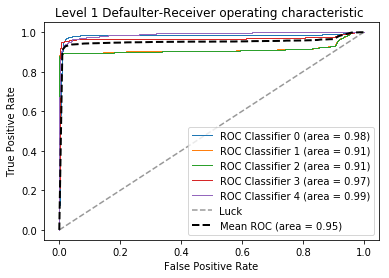

In [190]:
plot_roc(l1_truth,l1_proba,n_classifiers,"Level 1 Defaulter")

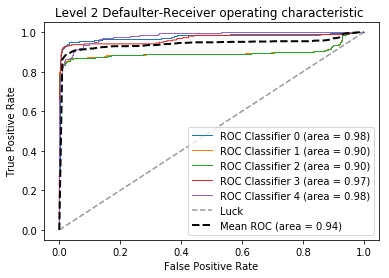

In [191]:
plot_roc(l2_truth,l2_proba,n_classifiers,"Level 2 Defaulter")

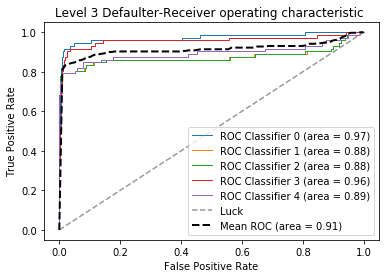

In [192]:
plot_roc(l3_truth,l3_proba,n_classifiers,"Level 3 Defaulter")

In [137]:
probabilities_l1l2l3 = np.array([l1_proba[:,4],l2_proba[:,4],l3_proba[:,0]]).T
np.save("best_multi_probabilities_l1l2l3.py",probabilities_l1l2l3)

In [141]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

principalComponents = pca.fit_transform(probabilities_l1l2l3)

print(pca.explained_variance_ratio_.sum())
principalComponents

0.9999999999999999


array([[-0.46038575,  0.03650633,  0.00219958],
       [-0.48125522,  0.04532174,  0.00163628],
       [ 0.44800551, -0.31167425,  0.01537054],
       ...,
       [-0.44683868,  0.03225662,  0.00207876],
       [ 0.42205468, -0.34412556,  0.0291827 ],
       [-0.46315327,  0.03791222,  0.00204619]])

In [181]:
gmm = GaussianMixture(
        n_components=2, covariance_type='full')
gmm.fit(principalComponents)
post_proba_gmm = gmm.predict_proba(principalComponents)[:,0]

In [193]:
prob_l1_df = pd.DataFrame(l1_proba,columns=["l1_pLogistic_defaulter","l1_pLogisticL1_defaulter","l1_pLogisticL2_defaulter","l1_pLinearSVC_defaulter","l1_pGPC_defaulter"])
prob_l1_df["name"] = to_modeling["name"]
prob_l2_df = pd.DataFrame(l2_proba,columns=["l2_pLogistic_defaulter","l2_pLogisticL1_defaulter","l2_pLogisticL2_defaulter","l2_pLinearSVC_defaulter","l2_pGPC_defaulter"])
prob_l2_df["name"] = to_modeling["name"]
prob_l3_df = pd.DataFrame(l1_proba,columns=["l3_pLogistic_defaulter","l3_pLogisticL1_defaulter","l3_pLogisticL2_defaulter","l1_pLinearSVC_defaulter","l3_pGPC_defaulter"])
prob_l3_df["name"] = to_modeling["name"]

prob_gmm_df = pd.DataFrame(post_proba_gmm,columns=["good_posterior_proba_gmm"])
prob_gmm_df["name"] = to_modeling["name"]


In [194]:
dfs = [to_modeling,prob_l1_df,prob_l2_df,prob_l3_df,prob_gmm_df]

multi_classifier_kfold_gmm = reduce(lambda left,right: pd.merge(left,right,on='name'), dfs)
multi_classifier_kfold_gmm.head()

name  old_cust  discont_cust  age  c_age  92101  92102  92103  \
0   Aaron Huston      True         False    0     38    0.0    0.0    0.0   
1    Abbey Kluth      True         False    0     46    0.0    0.0    0.0   
2    Abe Prophet      True         False    0     42    0.0    0.0    0.0   
3    Abel Emmett      True         False   45     45    0.0    0.0    0.0   
4  Abraham Maggi      True         False    0     41    0.0    0.0    0.0   

   92104  92105            ...             l2_pLogisticL1_defaulter  \
0    0.0    0.0            ...                         1.130794e-02   
1    0.0    0.0            ...                         1.685086e-07   
2    0.0    0.0            ...                         2.286501e-01   
3    0.0    0.0            ...                         8.807127e-03   
4    0.0    0.0            ...                         6.784451e-03   

   l2_pLogisticL2_defaulter  l2_pLinearSVC_defaulter  l2_pGPC_defaulter  \
0              1.076441e-02             5.554176e-05           0.001234   
1              1.457787e-07             1.000000e-07           0.000612   
2              2.315337e-01             6.430176e-02           0.062456   
3              8.663787e-03             3.647100e-05           0.002723   
4              6.620776e-03             8.348356e-04           0.017863   

   l3_pLogistic_defaulter  l3_pLogisticL1_defaulter  l3_pLogisticL2_defaulter  \
0                0.042425                  0.312416                  0.312071   
1                0.000074                  0.000063                  0.000060   
2                0.845209                  0.699104                  0.704185   
3                0.057739                  0.308455                  0.305929   
4                0.016394                  0.106555                  0.106829   

   l1_pLinearSVC_defaulter_y  l3_pGPC_defaulter  good_posterior_proba_gmm  
0               2.610104e-02           0.024195              9.999970e-01  
1               2.818853e-07           0.001542              9.999966e-01  
2               9.486117e-01           0.995189              9.947747e-50  
3               2.201540e-02           0.074693              9.999963e-01  
4               6.929951e-02           0.061745              9.999972e-01  

[5 rows x 114 columns]

In [ ]:
multi_classifier_kfold_gmm.to_csv("multi_classifier_kfold_gmm.csv",index = False)